In [17]:
from scipy.special import expit, logit
from imldiff.plots import plot_shap_value_distribution, \
    plot_shap_partial_dependence, plot_shap_values_stacked, plot_shap_values_hierarchically_clustered, \
    plot_decision_boundary
from imldiff.util import printmd
import shap
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
shap.initjs()

# Move Soft Decision Boundary Across Two Axes

## Create Models

In [18]:
a1 = 10
a2 = 10
f1 = lambda X: np.clip(a1*X[:,0] + a2*X[:,1], -5, 5)
f2 = lambda X: np.clip(a1*X[:,0] + a2*X[:,1] + 0.2, -5, 5)

c1 = lambda X: expit(f1(X))
c2 = lambda X: expit(f2(X))

In [19]:
feature_names = ['x1', 'x2']
num_samples = 1000
x_from = -1
x_to = 1
rng = np.random.RandomState(2)
X = rng.uniform(x_from, x_to, (num_samples, len(feature_names)))

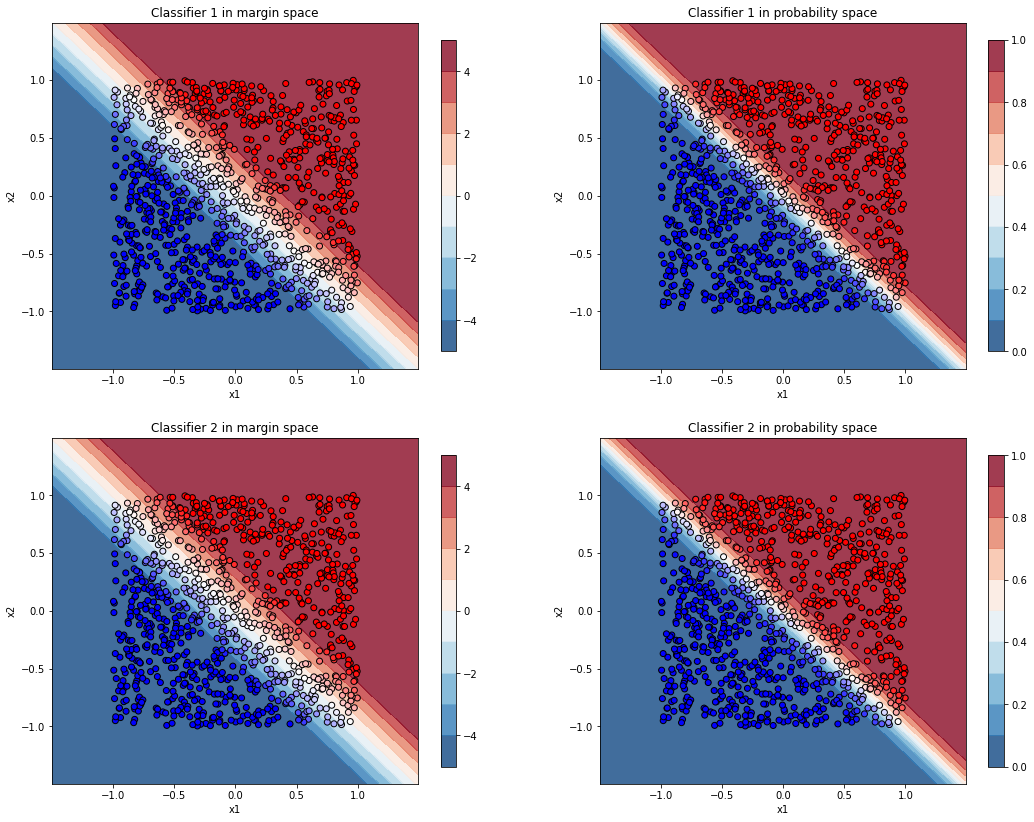

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(18, 14))
plot_decision_boundary(f1, X, title='Classifier 1 in margin space', feature_names=feature_names, z_from=-5, z_to=5, fig=fig, ax=axs[0,0])
plot_decision_boundary(f2, X, title='Classifier 2 in margin space', feature_names=feature_names, z_from=-5, z_to=5, fig=fig, ax=axs[1,0])
plot_decision_boundary(c1, X, title='Classifier 1 in probability space', feature_names=feature_names, z_from=0, z_to=1, fig=fig, ax=axs[0,1])
plot_decision_boundary(c2, X, title='Classifier 2 in probability space', feature_names=feature_names, z_from=0, z_to=1, fig=fig, ax=axs[1,1])
plt.show()

In [21]:
complement = lambda p: 1 - p
c1_positive_and_c2_negative = lambda p1, p2: p1 * complement(p2)
c1_negative_and_c2_positive = lambda p1, p2: complement(p1) * p2
c1_and_c2_different = lambda p1, p2: c1_positive_and_c2_negative(p1, p2) + c1_negative_and_c2_positive(p1, p2)
odds = lambda p: p / complement(p)
log_odds_ratio_from_proba = lambda p1, p2: np.log(odds(p1) / odds(p2))

c_c1_positive_and_c2_negative = lambda X: c1_positive_and_c2_negative(c1(X), c2(X))
c_c1_negative_and_c2_positive = lambda X: c1_negative_and_c2_positive(c1(X), c2(X))
c_c1_and_c2_different = lambda X: c1_and_c2_different(c1(X), c2(X))
f_log_odds_ratio_from_proba = lambda X: log_odds_ratio_from_proba(c1(X), c2(X))

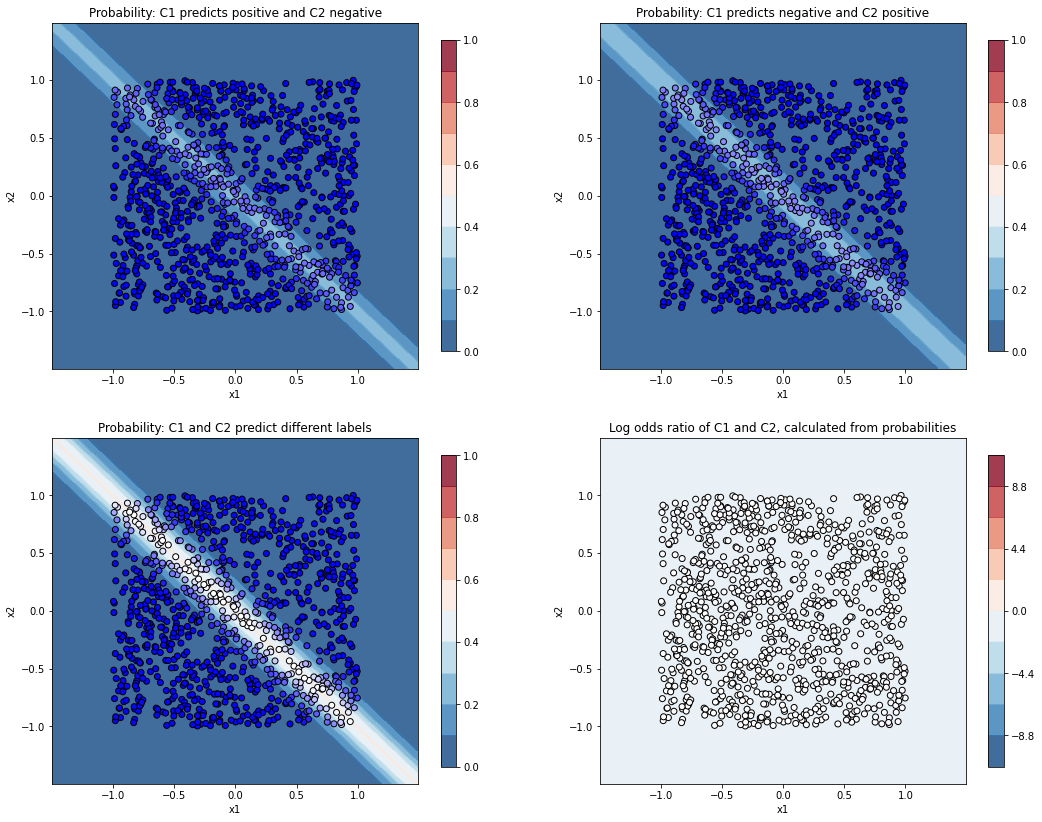

In [22]:
fig, axs = plt.subplots(2, 2, figsize=(18, 14))
plot_decision_boundary(c_c1_positive_and_c2_negative, X, title='Probability: C1 predicts positive and C2 negative', z_from=0, z_to=1, feature_names=feature_names, fig=fig, ax=axs[0,0])
plot_decision_boundary(c_c1_negative_and_c2_positive, X, title='Probability: C1 predicts negative and C2 positive', z_from=0, z_to=1, feature_names=feature_names, fig=fig, ax=axs[0,1])
plot_decision_boundary(c_c1_and_c2_different, X, title='Probability: C1 and C2 predict different labels', z_from=0, z_to=1, feature_names=feature_names, fig=fig, ax=axs[1,0])
plot_decision_boundary(f_log_odds_ratio_from_proba, X, title='Log odds ratio of C1 and C2, calculated from probabilities', z_from=-11, z_to=11, feature_names=feature_names, fig=fig, ax=axs[1,1])
plt.show()

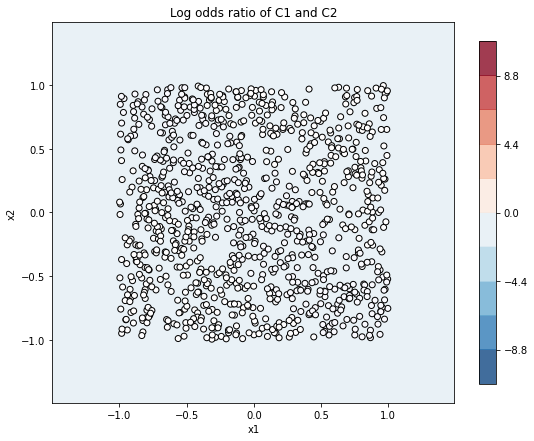

In [23]:
log_odds_ratio = lambda y1, y2: y1 - y2
f_log_odds_ratio = lambda X: log_odds_ratio(f1(X), f2(X))
plot_decision_boundary(f_log_odds_ratio, X, title='Log odds ratio of C1 and C2', z_from=-11, z_to=11, feature_names=feature_names);

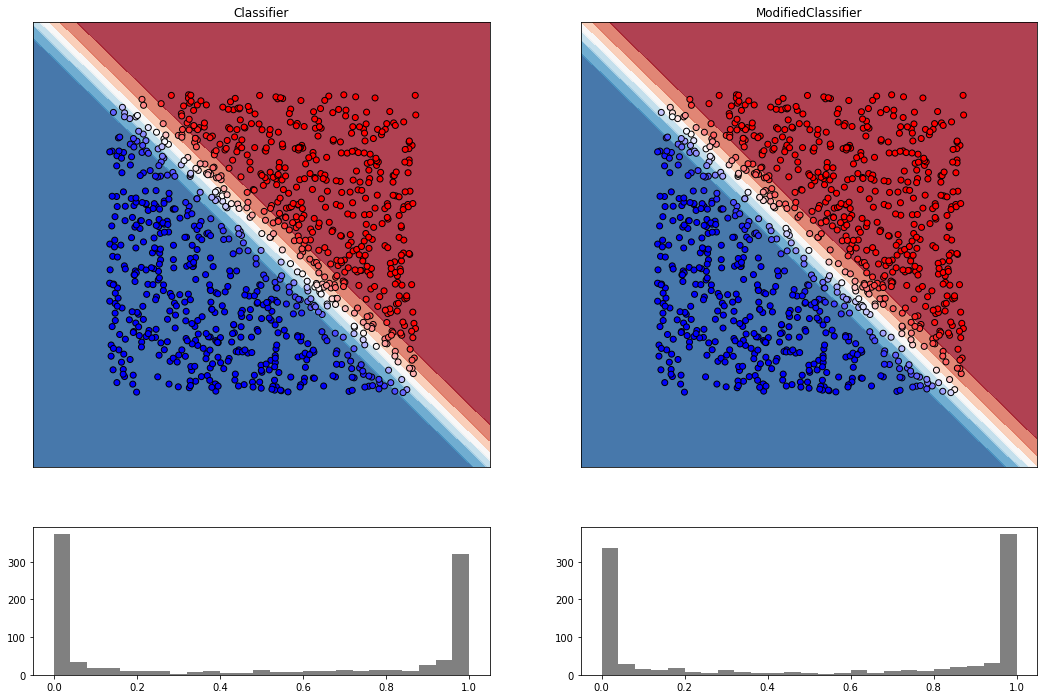

In [4]:
for classifier in classifiers:
    plot_decision_boundaries_and_distributions(classifier, X)

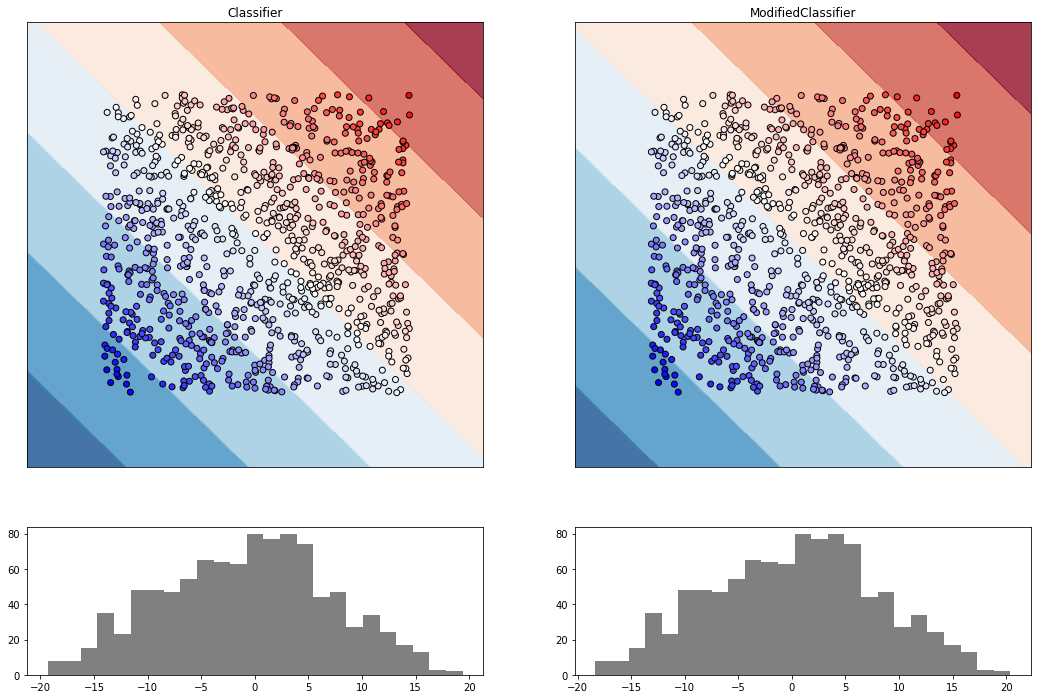

In [5]:
comparers = [
    DifferenceComparer(*classifiers),
    AbsoluteDifferenceComparer(*classifiers),
    ZeroClippedDifferenceComparer(*classifiers),
    ZeroClippedDifferenceComparer(*reversed(classifiers)),
    SumComparer(*classifiers),
    SimilarityComparer(*classifiers),
    DissimilarityComparer(*classifiers),
    DissimilarityComparer(*reversed(classifiers))
]

In [6]:
for comparer in comparers:
    plot_decision_boundaries_and_distributions(comparer, X)

## Generate Explanations

In [9]:
SHAPExplainer.group_name = notebook_name

probability_single_model_explainers = [
    make_shap_explainer(str(classifier), classifier.predict_proba, X, feature_names=feature_names)
    for classifier in classifiers]
log_odds_single_model_explainers = [
    make_shap_explainer(str(classifier) + ' Log Odds', classifier.predict_log_odds, X, feature_names=feature_names)
    for classifier in classifiers]
single_model_explainers = probability_single_model_explainers + log_odds_single_model_explainers

probability_comparison_explainers = [
    make_shap_explainer(str(comparer), comparer.predict_proba, X, feature_names=feature_names)
    for comparer in comparers]
log_odds_comparison_explainers = [
    make_shap_explainer(str(comparer) + ' Log Odds', comparer.predict_log_odds, X, feature_names=feature_names)
    for comparer in comparers]
comparison_explainers = probability_comparison_explainers + log_odds_comparison_explainers

explainers = single_model_explainers + comparison_explainers

Loaded explanation: explanations/Move Soft Decision Boundary Across Two Axes/Classifier.exp
Loaded explanation: explanations/Move Soft Decision Boundary Across Two Axes/ModifiedClassifier.exp
Loaded explanation: explanations/Move Soft Decision Boundary Across Two Axes/Classifier Log Odds.exp
Loaded explanation: explanations/Move Soft Decision Boundary Across Two Axes/ModifiedClassifier Log Odds.exp
Loaded explanation: explanations/Move Soft Decision Boundary Across Two Axes/Difference of ModifiedClassifier and Classifier.exp
Loaded explanation: explanations/Move Soft Decision Boundary Across Two Axes/Absolute Difference of ModifiedClassifier and Classifier.exp
Loaded explanation: explanations/Move Soft Decision Boundary Across Two Axes/Sum of Classifier and ModifiedClassifier.exp
Loaded explanation: explanations/Move Soft Decision Boundary Across Two Axes/Similarity of Classifier and ModifiedClassifier.exp
Loaded explanation: explanations/Move Soft Decision Boundary Across Two Axes/Rat

## Analyze

### SHAP Value Distribution

### Classifier

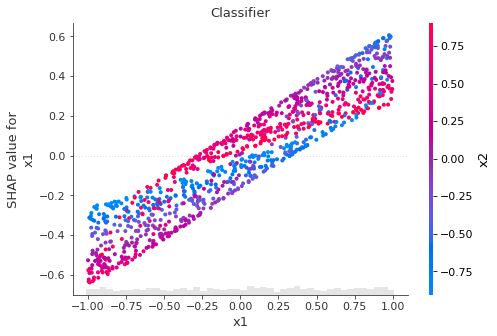

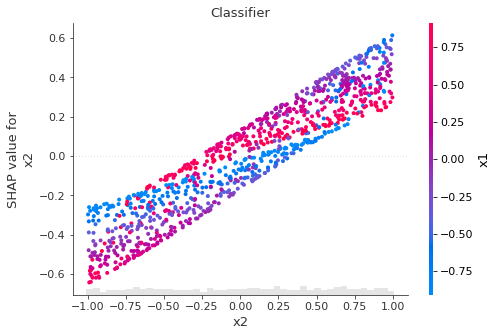

### ModifiedClassifier

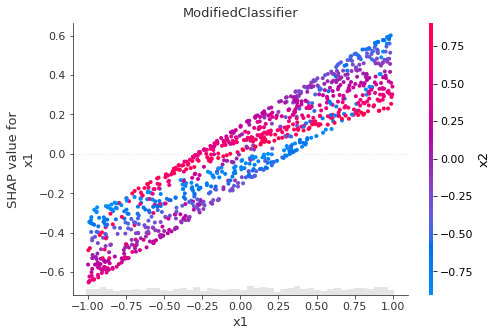

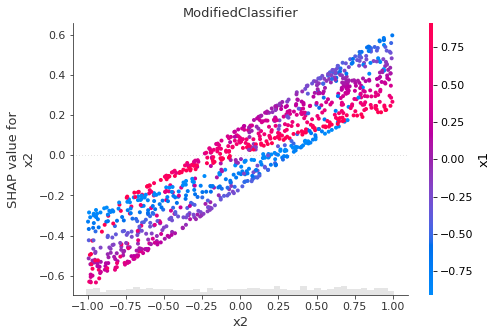

### Classifier Log Odds

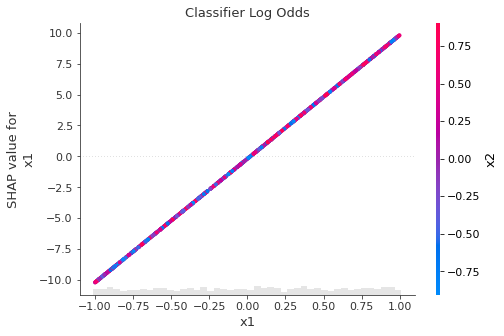

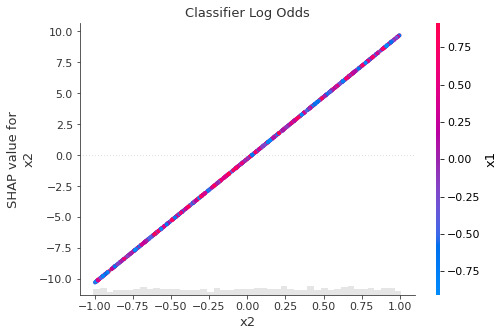

### ModifiedClassifier Log Odds

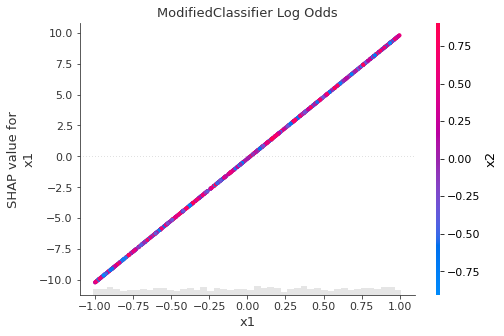

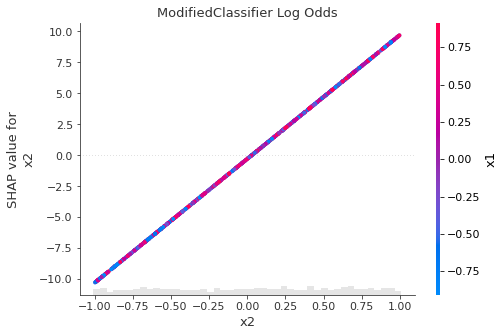

### Difference of ModifiedClassifier and Classifier

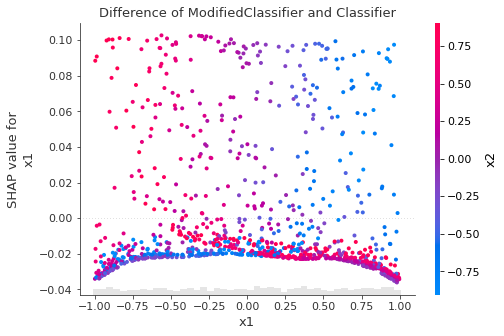

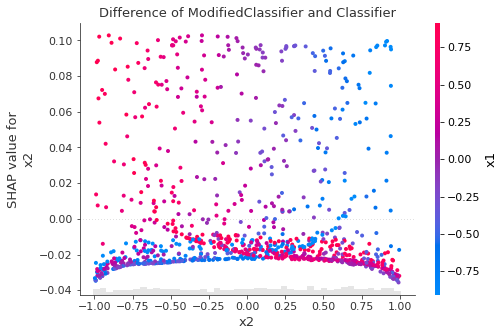

### Absolute Difference of ModifiedClassifier and Classifier

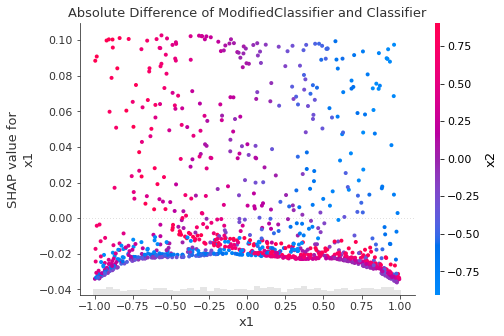

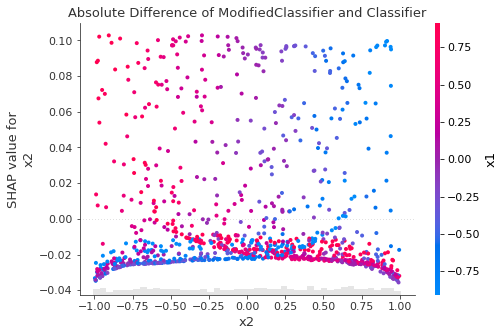

### Sum of Classifier and ModifiedClassifier

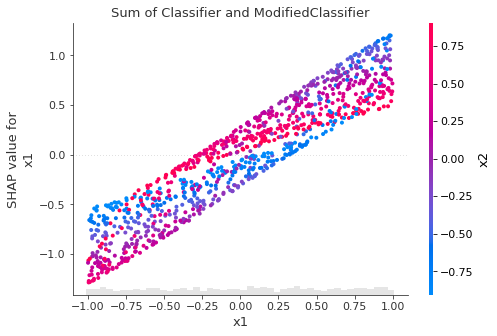

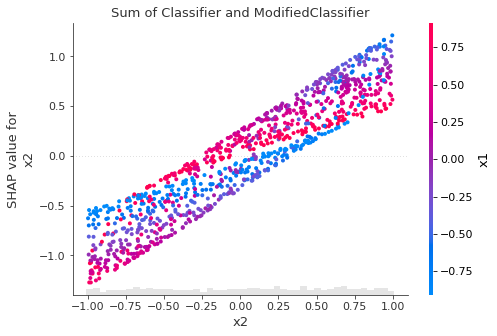

### Similarity of Classifier and ModifiedClassifier

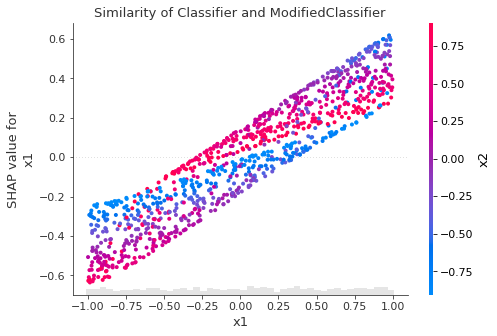

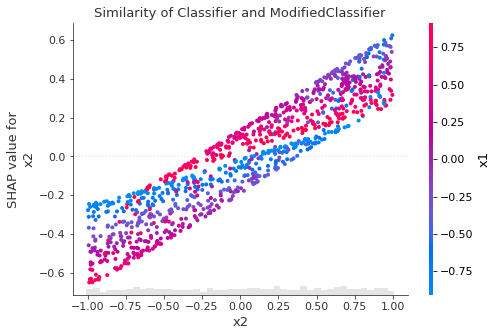

### Ratio of ModifiedClassifier and Classifier

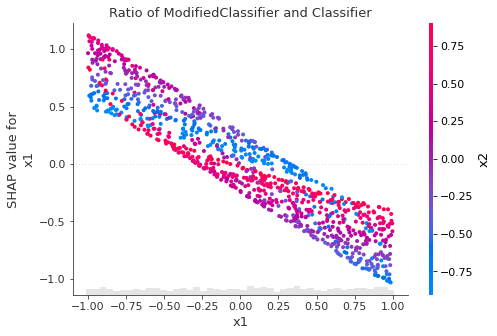

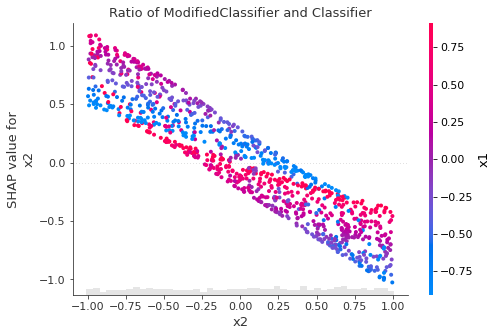

### Difference of ModifiedClassifier and Classifier Log Odds

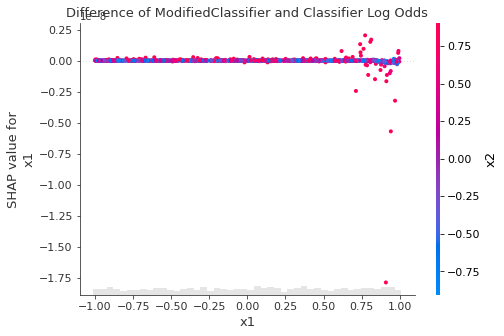

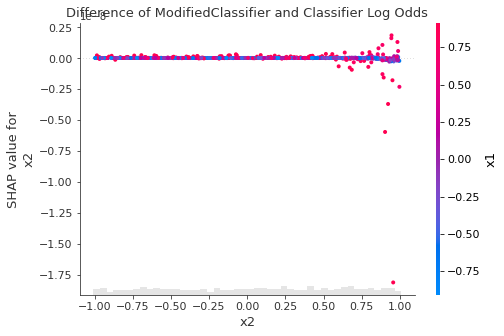

### Absolute Difference of ModifiedClassifier and Classifier Log Odds

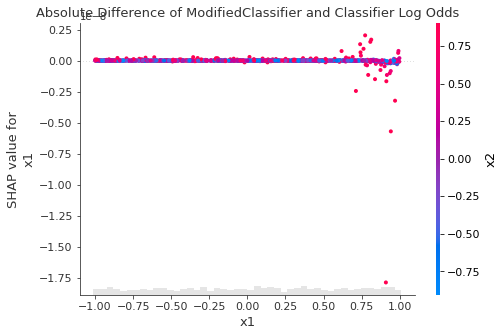

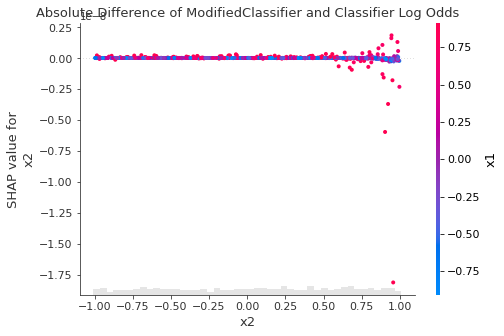

### Sum of Classifier and ModifiedClassifier Log Odds

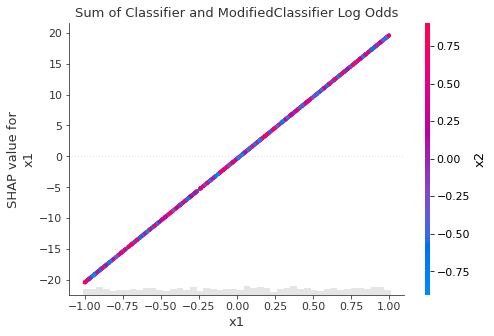

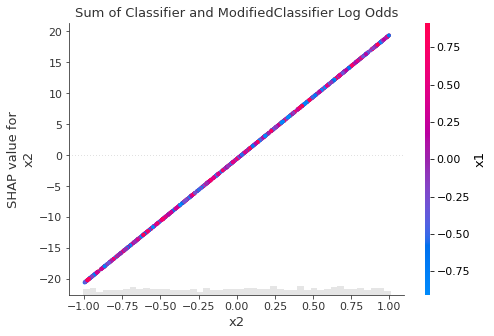

### Similarity of Classifier and ModifiedClassifier Log Odds

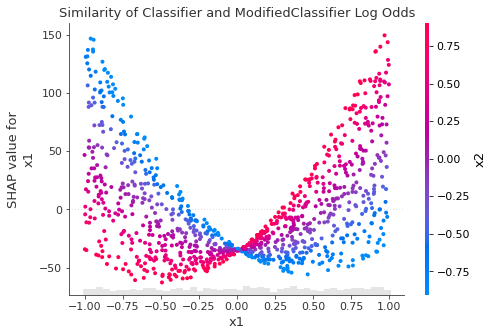

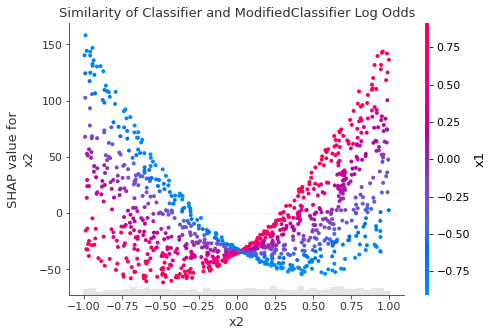

### Ratio of ModifiedClassifier and Classifier Log Odds

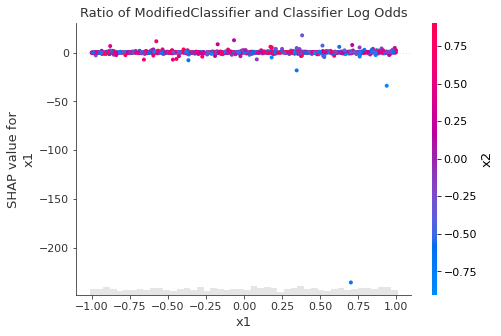

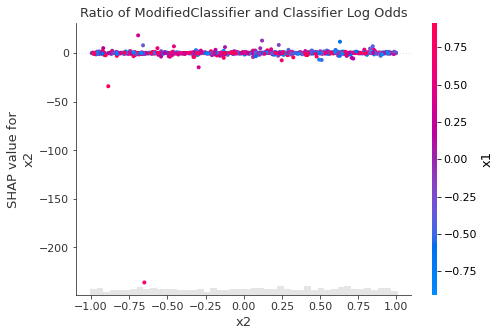

In [10]:
for explainer in explainers:
    plot_shap_value_distribution(explainer)

### Features' Partial Dependence Plots

### Classifier

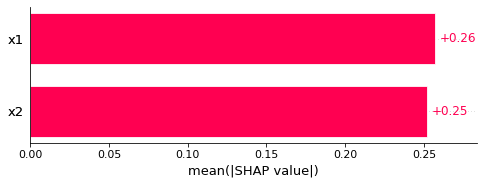

### ModifiedClassifier

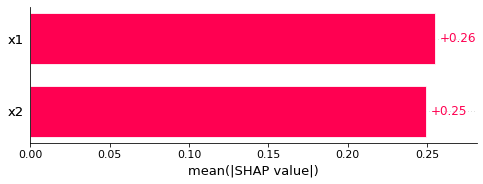

### Classifier Log Odds

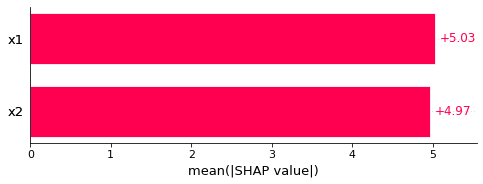

### ModifiedClassifier Log Odds

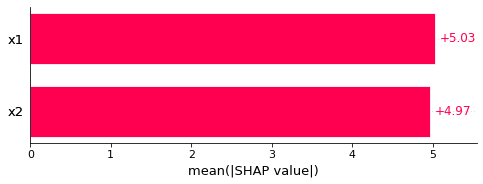

### Difference of ModifiedClassifier and Classifier

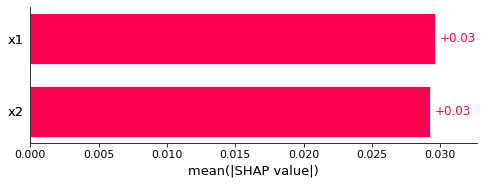

### Absolute Difference of ModifiedClassifier and Classifier

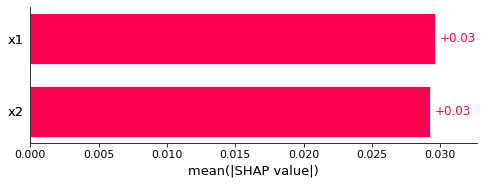

### Sum of Classifier and ModifiedClassifier

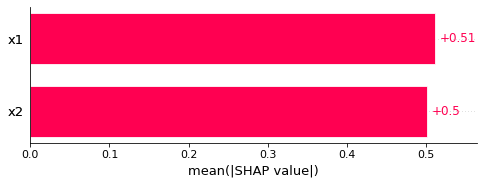

### Similarity of Classifier and ModifiedClassifier

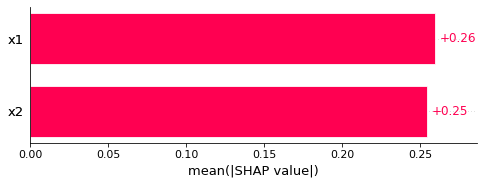

### Ratio of ModifiedClassifier and Classifier

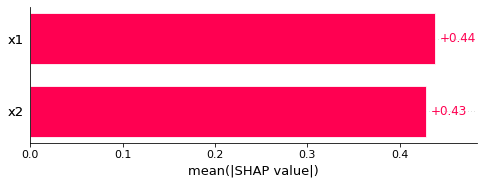

### Difference of ModifiedClassifier and Classifier Log Odds

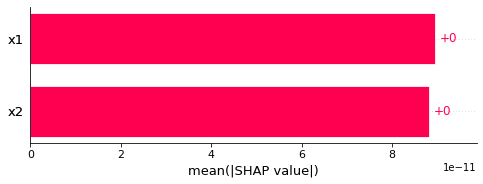

### Absolute Difference of ModifiedClassifier and Classifier Log Odds

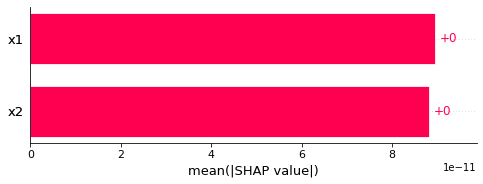

### Sum of Classifier and ModifiedClassifier Log Odds

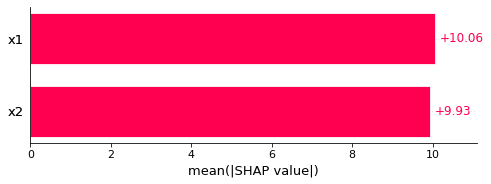

### Similarity of Classifier and ModifiedClassifier Log Odds

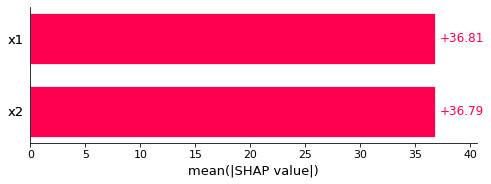

### Ratio of ModifiedClassifier and Classifier Log Odds

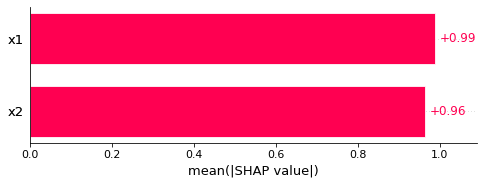

In [11]:
for explainer in explainers:
    plot_shap_partial_dependence(explainer)

### Stacked SHAP Explanations, Clustered by Similarity

### Classifier

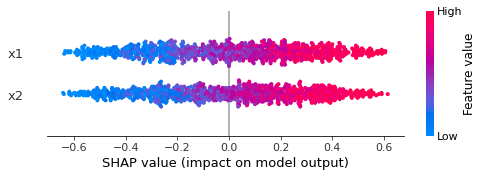

### ModifiedClassifier

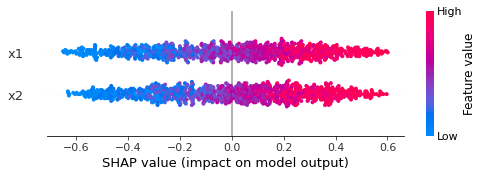

### Classifier Log Odds

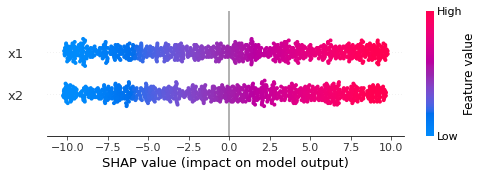

### ModifiedClassifier Log Odds

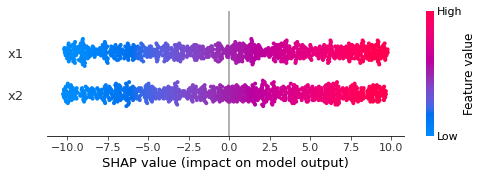

### Difference of ModifiedClassifier and Classifier

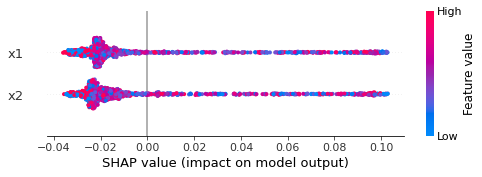

### Absolute Difference of ModifiedClassifier and Classifier

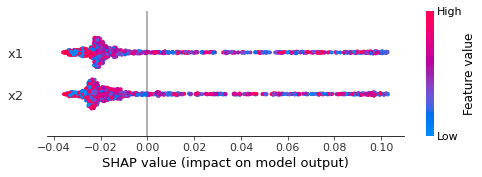

### Sum of Classifier and ModifiedClassifier

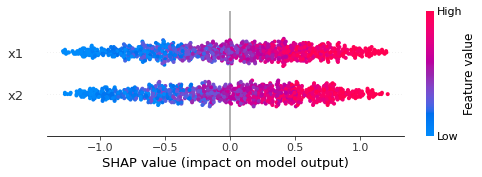

### Similarity of Classifier and ModifiedClassifier

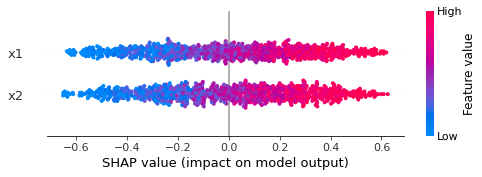

### Ratio of ModifiedClassifier and Classifier

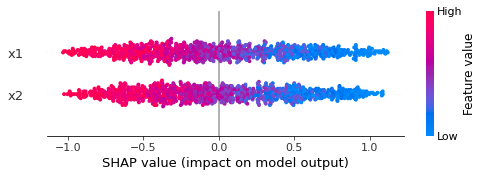

### Difference of ModifiedClassifier and Classifier Log Odds

KeyboardInterrupt: 

In [12]:
plot_shap_values_stacked(*probability_single_model_explainers)
plot_shap_values_stacked(*log_odds_single_model_explainers)

for explainer in comparison_explainers:
    plot_shap_values_stacked(explainer)

### Hierarchically Clustered SHAP Values

In [ ]:
for explainer in explainers:
    plot_shap_values_hierarchically_clustered(explainer)
